**Credit Approval Prediction**

Credit scores are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.target import FeatureCorrelation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load and preview the data
dataset1 = '/content/drive/MyDrive/KCBF_DataScience_Project/Data/application_record.csv'
dataset2 = '/content/drive/MyDrive/KCBF_DataScience_Project/Data/credit_record.csv'
application = pd.read_csv(dataset1)
application.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
412388,6782045,F,N,Y,0,135000.0,Commercial associate,Higher education,Married,House / apartment,-12851,-3562,1,0,0,0,Laborers,2.0
408188,6754584,F,N,Y,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-15738,-3660,1,1,0,0,Laborers,1.0
151701,5712826,M,N,N,0,180000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-12429,-1983,1,0,0,0,Core staff,1.0
336471,6373051,M,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13818,-6266,1,0,0,0,NaN,2.0
263310,6594808,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-18969,-10222,1,0,0,0,High skill tech staff,2.0


In [ ]:
credit = pd.read_csv(dataset2)
credit.sample(5)

,ID,MONTHS_BALANCE,STATUS
870074,5120541,0,C
386282,5045742,-4,C
606792,5078684,0,C
853200,5118448,-1,1
198382,5017420,-1,C


In [ ]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [ ]:
#Rename the columns
application.columns = ['id','gender','owns_car','owns_property','no_of_children','total_income','income_type','education_type','family_status','housing_type','birthday','employment_duration','owns_mobile','has_work_phone','owns_phone','owns_email','occupation_type','family_size']
application.columns

Index(['id', 'gender', 'owns_car', 'owns_property', 'no_of_children',
       'total_income', 'income_type', 'education_type', 'family_status',
       'housing_type', 'birthday', 'employment_duration', 'owns_mobile',
       'has_work_phone', 'owns_phone', 'owns_email', 'occupation_type',
       'family_size'],
      dtype='object')

Change the categorical data values to discrete values i.e (1, 0)

In [ ]:
#Using sklearn preprocessing to Label Encoder to convert categorical data to numerical form for easy modelling
encode=LabelEncoder()

In [ ]:
application['gender'] = encode.fit_transform(application['gender'])
application['owns_car'] = encode.fit_transform(application['owns_car'])
application['owns_property'] = encode.fit_transform(application['owns_property'])
application['income_type'] = encode.fit_transform(application['income_type'])
application['education_type'] = encode.fit_transform(application['education_type'])
application['family_status'] = encode.fit_transform(application['family_status'])
application['housing_type'] = encode.fit_transform(application['housing_type'])
application['has_work_phone'] = encode.fit_transform(application['has_work_phone'])
application['owns_phone'] = encode.fit_transform(application['owns_phone'])
application['owns_email'] = encode.fit_transform(application['owns_email'])

**Mapping**

Gender: Class mapping: F --> 0
                       M --> 1

Owns_car: Class mapping: N --> 0
                         Y --> 1

Owns_property: Class mapping: N --> 0
                              Y --> 1

Income_Type: Class mapping: Commercial associate --> 0
                            Pensioner --> 1
                            State servant --> 2
                            Student --> 3
                            Working --> 4

Education_Type: Class mapping: Academic degree --> 0
                               Higher education --> 1
                               Incomplete higher --> 2
                               Lower secondary --> 3
                               Secondary / secondary special --> 4

Family_status: Class mapping: Civil marriage --> 0
                              Married --> 1
                              Separated --> 2
                              Single / not married --> 3
                              Widow --> 4

Housing_Type: Class mapping: Co-op apartment --> 0
                             House / apartment --> 1
                             Municipal apartment --> 2
                             Office apartment --> 3
                             Rented apartment --> 4
                             With parents --> 5

Owns_mobile: Class mapping: 1 --> 0

has_work_phone: Class mapping: 0.0 --> 0
                               1.0 --> 1

owns_phone: Class mapping: 0.0 --> 0
                           1.0 --> 1

owns_email: Class mapping: 0.0 --> 0
                           1.0 --> 1

In [ ]:
#Preview dataset after change
application.sample(10)

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size
330346,6336415,0,0,1,0,135000.0,0,4,1,1,-9728,-757,1,1,1,0,Sales staff,2.0
106211,5445220,0,1,1,0,112500.0,1,4,1,1,-21646,365243,1,0,1,0,NaN,2.0
255719,6064431,0,0,1,0,292500.0,1,4,2,1,-23317,365243,1,0,0,1,NaN,1.0
77507,5824622,0,0,0,0,247500.0,4,1,1,1,-10492,-2363,1,1,1,0,Managers,2.0
128112,6642899,1,1,1,0,315000.0,0,4,1,1,-17826,-1764,1,0,1,0,Drivers,2.0
201775,5906515,0,0,0,0,180000.0,4,4,1,1,-14211,-4318,1,1,1,0,Core staff,2.0
346141,6423768,0,0,1,0,72000.0,1,4,1,1,-22478,365243,1,0,0,0,NaN,2.0
48374,5148847,0,1,0,2,135000.0,4,1,1,1,-12804,-4977,1,0,0,0,Accountants,4.0
202188,5907084,0,1,1,1,135000.0,4,1,1,1,-16133,-3982,1,0,0,0,Sales staff,3.0
236254,6586838,1,0,1,0,360000.0,0,1,1,1,-11459,-436,1,0,1,1,High skill tech staff,2.0


In [ ]:
application.isnull().any()

id                     False
gender                 False
owns_car               False
owns_property          False
no_of_children         False
total_income           False
income_type            False
education_type         False
family_status          False
housing_type           False
birthday               False
employment_duration    False
owns_mobile            False
has_work_phone         False
owns_phone             False
owns_email             False
occupation_type         True
family_size            False
dtype: bool

In [ ]:
application.isnull().sum()

id                          0
gender                      0
owns_car                    0
owns_property               0
no_of_children              0
total_income                0
income_type                 0
education_type              0
family_status               0
housing_type                0
birthday                    0
employment_duration         0
owns_mobile                 0
has_work_phone              0
owns_phone                  0
owns_email                  0
occupation_type        134203
family_size                 0
dtype: int64

In [ ]:
#Dropping occupation_type
#Check impact
application['occupation_type']

0                    NaN
1                    NaN
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552               NaN
438553          Laborers
438554       Sales staff
438555               NaN
438556       Sales staff
Name: occupation_type, Length: 438557, dtype: object

In [ ]:
# Dropping occupation_type column since it has many missing values.
application.drop(['occupation_type'], axis = 1, inplace = True)
application.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0


In [ ]:
application.isnull().any()

id                     False
gender                 False
owns_car               False
owns_property          False
no_of_children         False
total_income           False
income_type            False
education_type         False
family_status          False
housing_type           False
birthday               False
employment_duration    False
owns_mobile            False
has_work_phone         False
owns_phone             False
owns_email             False
family_size            False
dtype: bool

In [ ]:
#Checking for duplicates
application.loc[application.total_income == 315000.0].loc[application.income_type == 'Working'].loc[application.birthday == -10554].loc[application.employment_duration == -1194]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size


There are duplicate records in the dataset. They have all the same values except for the 'id'.

In [ ]:
#Dropping duplicate records so as to have one customer having just one id
application = application.drop_duplicates(subset=application.columns[1:])
application.loc[application.birthday == -10554].loc[application.employment_duration == -1194]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size
213,5009031,0,0,1,0,315000.0,4,4,3,1,-10554,-1194,1,0,0,0,1.0


In [ ]:
#Once again checking for null values
application.isnull().sum()

id                     0
gender                 0
owns_car               0
owns_property          0
no_of_children         0
total_income           0
income_type            0
education_type         0
family_status          0
housing_type           0
birthday               0
employment_duration    0
owns_mobile            0
has_work_phone         0
owns_phone             0
owns_email             0
family_size            0
dtype: int64

In [ ]:
application['owns_phone'].isnull().values

array([False, False, False, ..., False, False, False])

In [ ]:
#Checking if the same record is missing data values on has_work_phone, owns_phone,owns_email,family_size
application.loc[application['id'] == 6089954]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size


In [ ]:
#Dropping the last record in the application dataset since it has several values missing
#application = application.drop(270804)
#application.isnull().any()

In [ ]:
#Rename the columns of credit
credit.columns = ['id','months_balance','status']
credit.sample(10)

,id,months_balance,status
451572,5054019,-48,C
654629,5090279,-31,0
815807,5116345,-9,C
12203,5002277,-15,0
383203,5045555,-10,C
979336,5142332,-20,C
343020,5036870,-29,C
131872,5011104,-24,X
1013225,5146324,-3,0
261376,5023610,0,C


In [ ]:
#Merging the application and credit datasets for easier analysis
data = pd.merge(application, credit, how='inner', on=['id'])
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size,months_balance,status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,C


**Exploratory Data Analysis**

In [ ]:
data.describe()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size,months_balance
count,2.191730e+05,219173.000000,219173.000000,219173.000000,219173.000000,2.191730e+05,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000,219173.0,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000
mean,5.076276e+06,0.348998,0.375516,0.658941,0.417291,1.827611e+05,2.341023,3.142705,1.367655,1.246376,-16223.989433,62009.668755,1.0,0.225333,0.292527,0.084778,2.185205,-19.776213
std,4.064917e+04,0.476655,0.484257,0.474066,0.768615,1.009426e+05,1.744307,1.319734,0.956532,0.882553,4150.124178,140043.926967,0.0,0.417803,0.454924,0.278551,0.927131,14.216240
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.037063e+06,0.000000,0.000000,0.000000,0.000000,1.125000e+05,1.000000,1.000000,1.000000,1.000000,-19682.000000,-3154.000000,1.0,0.000000,0.000000,0.000000,2.000000,-30.000000
50%,5.069239e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,-15909.000000,-1517.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.112992e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12752.000000,-353.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150479e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


Categorizing the records as defaulted or not defaulted. Any record with status (0,1,2,3,4,5) is labelled as defaulted whereas, any record with status (X, C) is labelled as not defaulted.

In [ ]:
defaulters= ['0','1','2','3','4','5']

data['default_status'] = np.where(data.status.isin(defaulters), 1, 0)
data = data.drop('status' , axis = 1)
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size,months_balance,default_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,0


**Univariate Analysis**

*Categorical data*

Checking the distribution of each of the categorical data i.e gender, owns_car, income_type, education_type, family_status, housing_type, owns_mobile, has_work_phone, owns_phone, owns_email, occupation_type



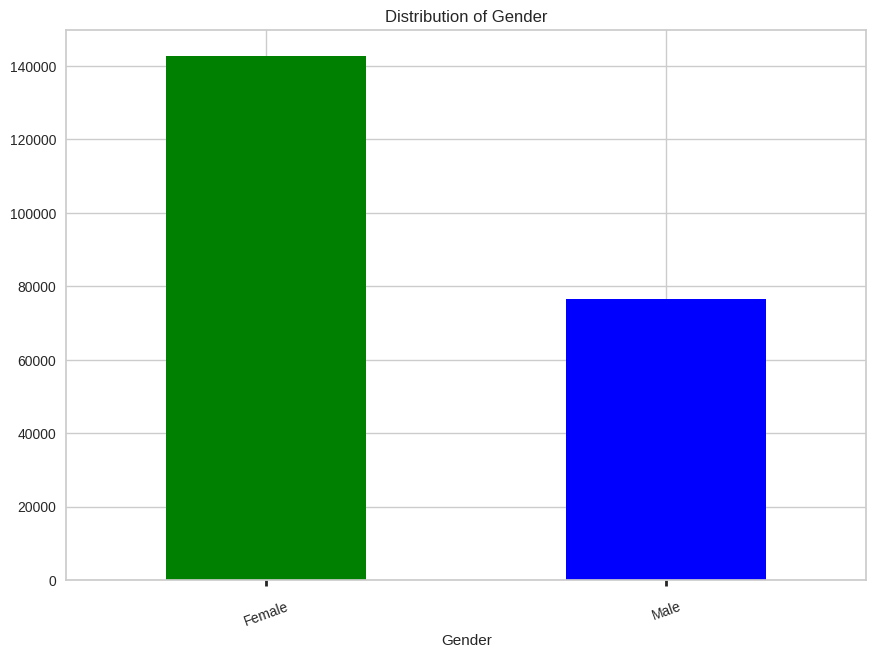

In [ ]:
#A bar plot of the 'gender' variable
fig=plt.figure()
cx=fig.add_axes([0,0,1,1])
data.gender.value_counts().plot(kind = 'bar', rot = 0, color = ['green', 'blue'])
cx.set_xlabel('Gender')
cx.set_title('Distribution of Gender')
cx.set_xticklabels(['Female','Male'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);

In [ ]:
#Value counts of the 'owns_car' variable
data.owns_car.value_counts()

owns_car
0    136870
1     82303
Name: count, dtype: int64

In [ ]:
#Value counts of the 'owns_property' variable
data.owns_property.value_counts()

owns_property
1    144422
0     74751
Name: count, dtype: int64

In [ ]:
#Value counts of the 'owns_mobile' variable
data.owns_mobile.value_counts()

owns_mobile
1    219173
Name: count, dtype: int64

In [ ]:
#Dropping the owns_mobile feature
data.drop(['owns_mobile'], axis = 1, inplace = True)
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,has_work_phone,owns_phone,owns_email,family_size,months_balance,default_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-4,0


In [ ]:
#Value counts of the 'has_work_phone' variable
data.has_work_phone.value_counts()

has_work_phone
0    169786
1     49387
Name: count, dtype: int64

In [ ]:
#Value counts of the 'owns_phone' variable
data.owns_phone.value_counts()

owns_phone
0    155059
1     64114
Name: count, dtype: int64

In [ ]:
#Value counts of the 'owns_email' variable
data.owns_email.value_counts()

owns_email
0    200592
1     18581
Name: count, dtype: int64

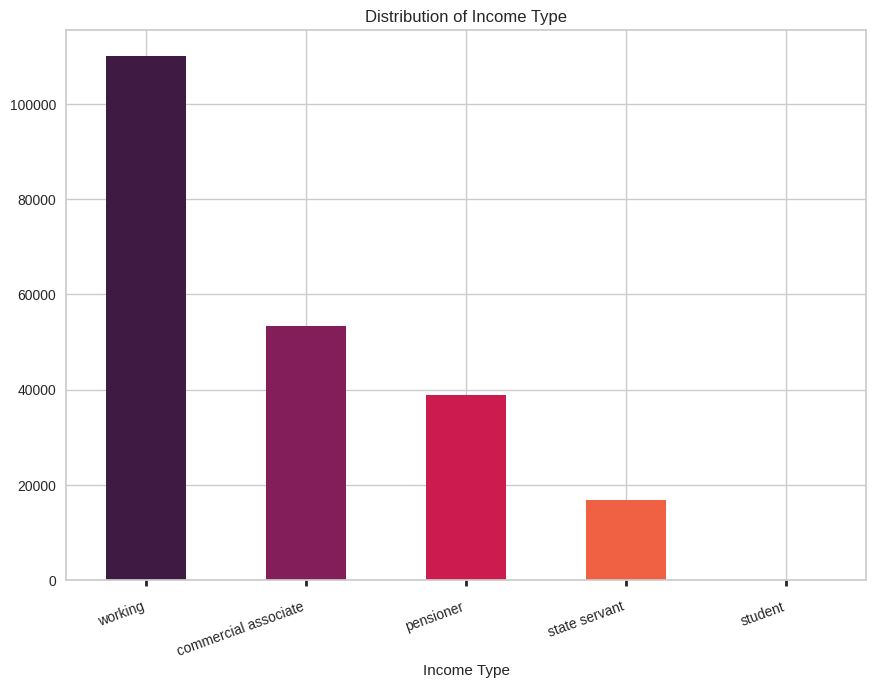

In [ ]:
#A bar plot of the 'income_type' variable
fig=plt.figure()
bx=fig.add_axes([0,0,1,1])
data.income_type.value_counts().plot(kind = 'bar', rot = 15,
                                    color = sns.color_palette('rocket', data.income_type.nunique()))
bx.set_xlabel('Income Type')
bx.set_title('Distribution of Income Type')
bx.set_xticklabels(['working','commercial associate','pensioner','state servant','student'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);
plt.xticks(ha = 'right');

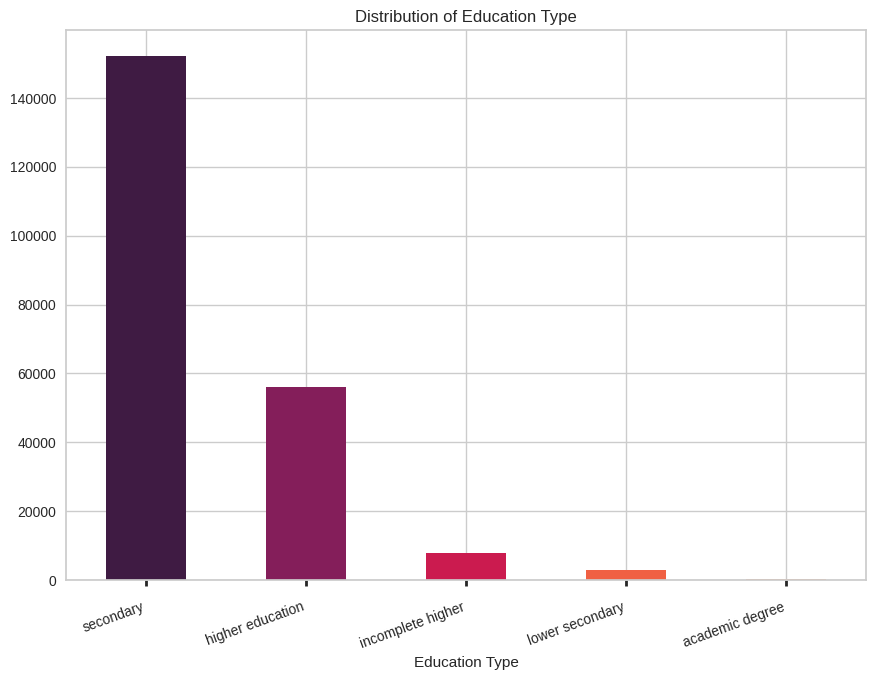

In [ ]:
#A bar plot of the 'education_type' variable
fig=plt.figure()
dx=fig.add_axes([0,0,1,1])
data.education_type.value_counts().plot(kind = 'bar', rot = 15,
                                    color = sns.color_palette('rocket', data.education_type.nunique()))
dx.set_xlabel('Education Type')
dx.set_title('Distribution of Education Type')
dx.set_xticklabels(['secondary','higher education','incomplete higher','lower secondary','academic degree'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20)
plt.xticks(ha = 'right');

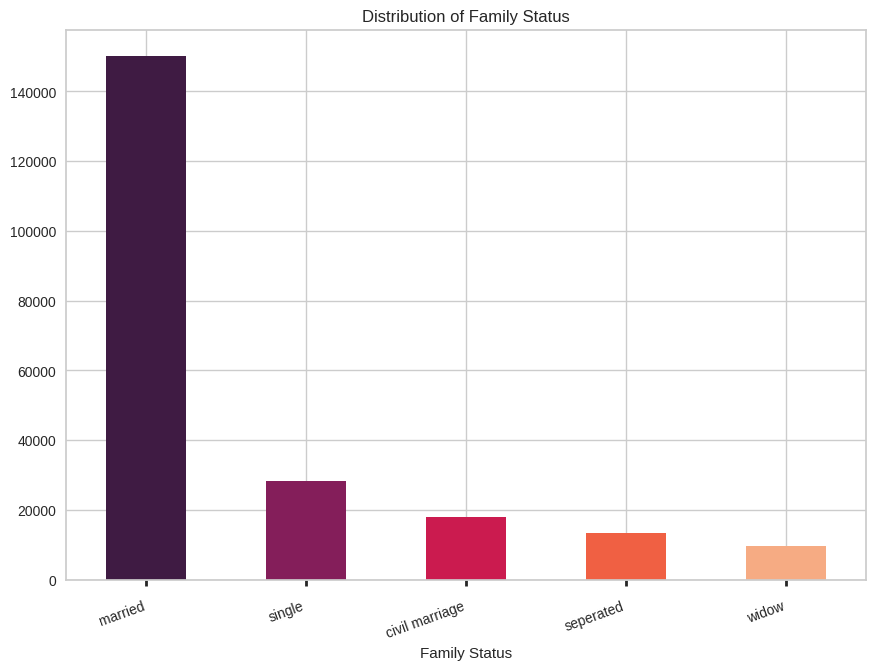

In [ ]:
#A bar plot of the 'family_status' variable
fig=plt.figure()
fx=fig.add_axes([0,0,1,1])
data.family_status.value_counts().plot(kind = 'bar', rot = 15,
                                    color = sns.color_palette('rocket', data.family_status.nunique()))
fx.set_xlabel('Family Status')
fx.set_title('Distribution of Family Status')
fx.set_xticklabels(['married','single','civil marriage','seperated','widow'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20)
plt.xticks(ha = 'right');

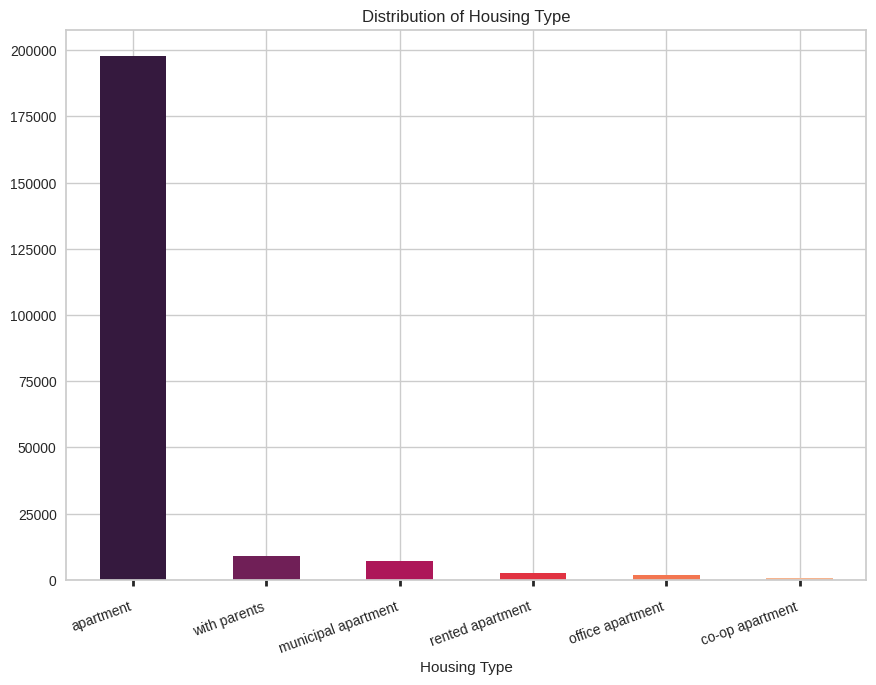

In [ ]:
#A bar plot of the 'housing_type' variable
fig=plt.figure()
gx=fig.add_axes([0,0,1,1])
data.housing_type.value_counts().plot(kind = 'bar', rot = 15,
                                    color = sns.color_palette('rocket', data.housing_type.nunique()))
gx.set_xlabel('Housing Type')
gx.set_title('Distribution of Housing Type')
gx.set_xticklabels(['apartment','with parents','municipal apartment','rented apartment','office apartment','co-op apartment'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);
plt.xticks(ha = 'right');

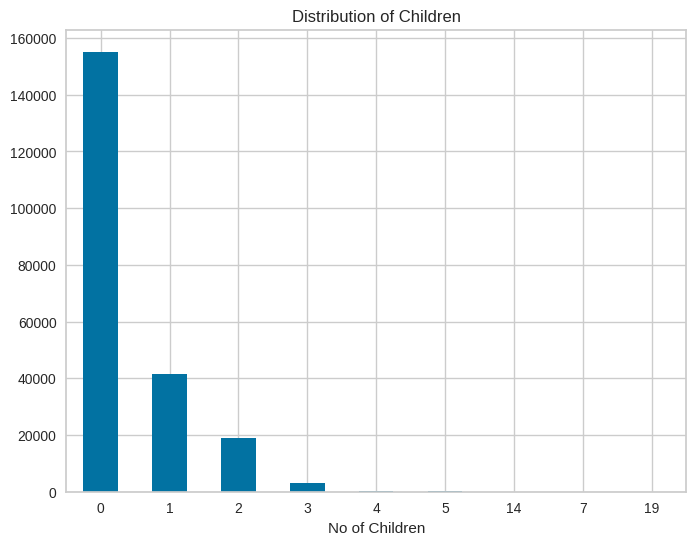

In [ ]:
#A bar plot of the 'no_of_children' variable
plt.figure(figsize = (8, 6))
data.no_of_children.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('No of Children')
plt.title('Distribution of Children')
plt.show()

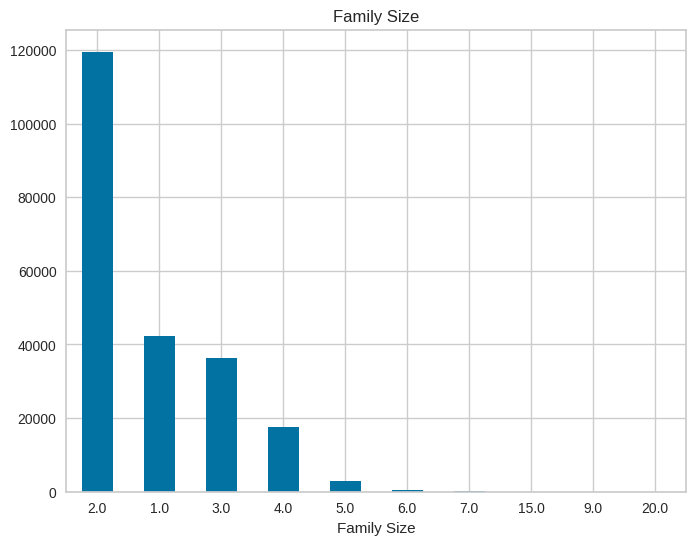

In [ ]:
#A bar plot of the 'family_size' variable
plt.figure(figsize = (8, 6))
data.family_size.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Family Size')
plt.title('Family Size')
plt.show()

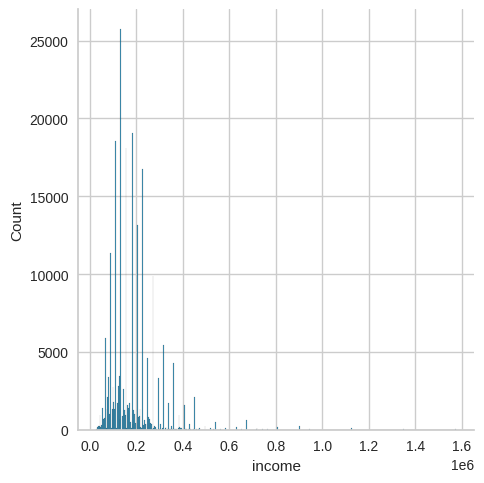

In [ ]:
#A plot for income distribution
income = pd.Series(data.total_income, name="income")
sns.displot(income)
plt.show()

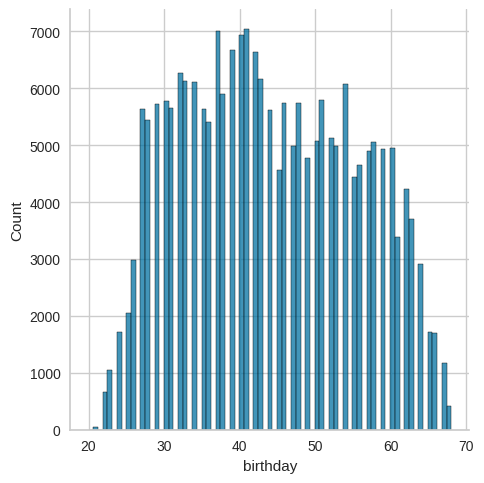

In [ ]:
#Birth days
birth_days = data.birthday.apply(lambda x: int(-x // 365))
sns.displot(birth_days)
plt.show()

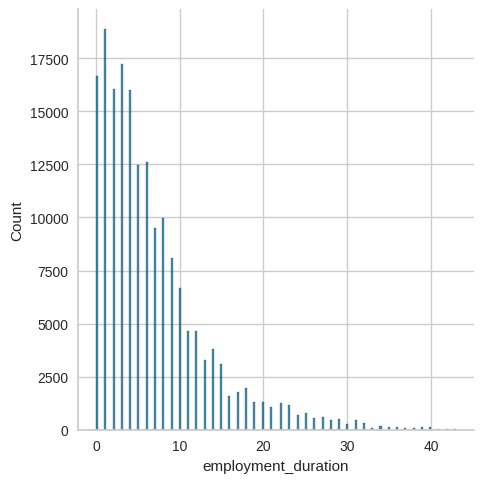

In [ ]:
#Employment duration
employment_duration = data[data.employment_duration<0].employment_duration.apply(lambda x: int(-x // 365))
sns.displot(employment_duration)
plt.show()

*Bivariate Analysis*

In [ ]:
corr = data.corr()

<Axes: >

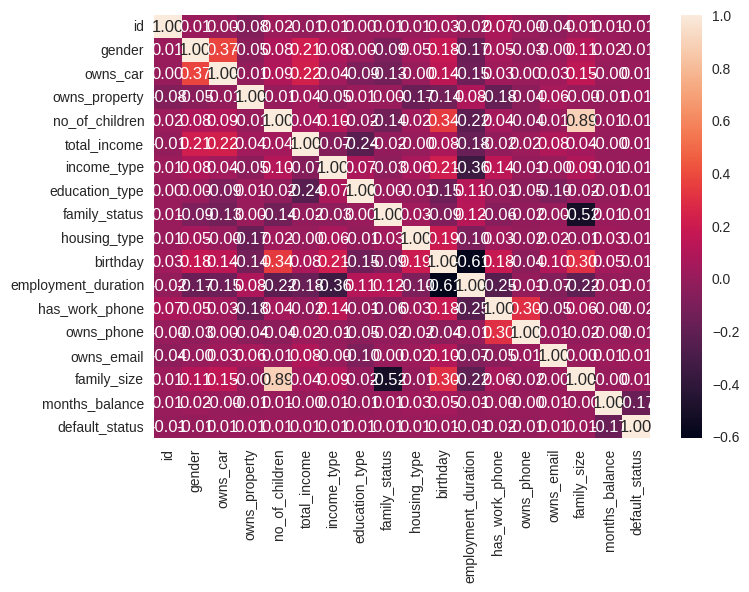

In [ ]:
#A heatmap of the correlations of the variables in the dataset
#Generate heat map, allow annotations and place floats in map
sns.heatmap(corr, annot = True, fmt = ".2f")

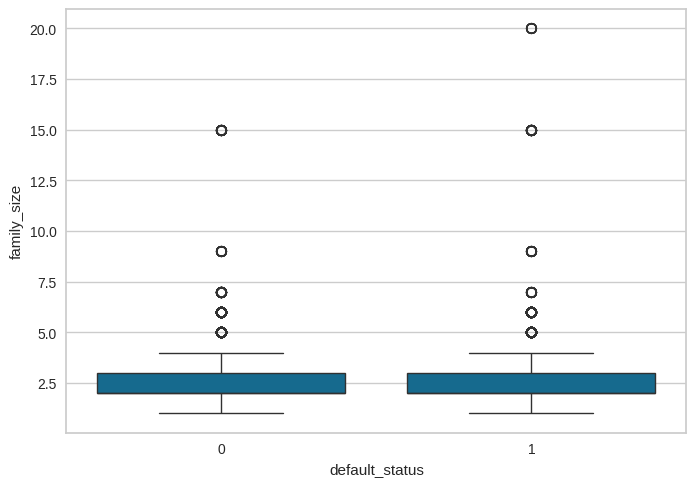

In [ ]:
#Boxplot for family size against dafault status
sns.boxplot(x = 'default_status', y = 'family_size', data = data)
plt.show()

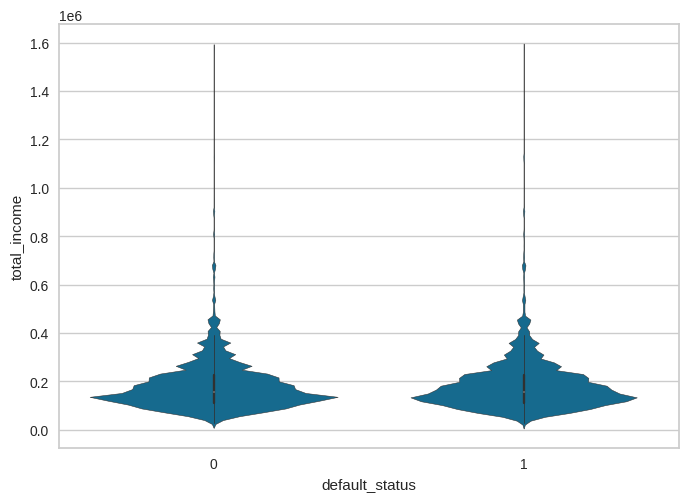

In [ ]:
#Violinplot for family size against dafault status
sns.violinplot(x = 'default_status', y = 'total_income', data = data)
plt.show()

In [ ]:
#Pairig plot to show relationship between features in the dataset
sns.pairplot(data.sample(1000))

Output hidden; open in https://colab.research.google.com to view.

**FEATURE SELECTION**

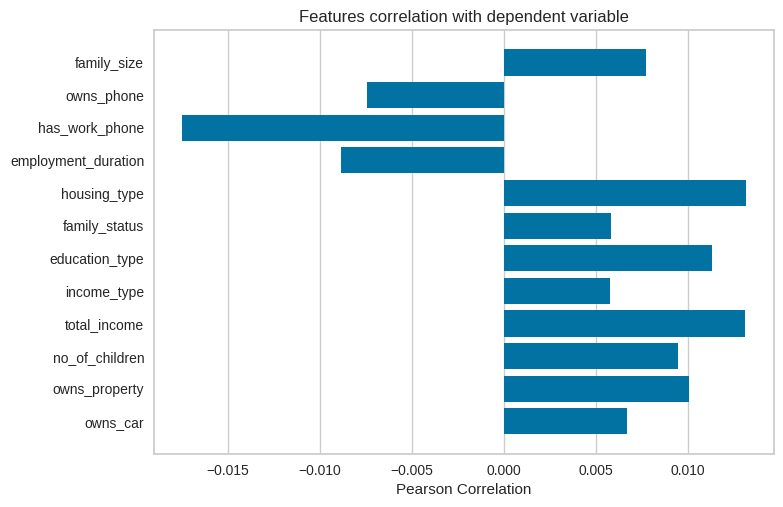

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
target = data['default_status']
features = data[['owns_car','owns_property','no_of_children','total_income','income_type','education_type',
                       'family_status','housing_type','employment_duration','has_work_phone','owns_phone','family_size']]
feature_names = data.columns
num_features = len(features.columns)
visual = FeatureCorrelation(labels=features.columns[:num_features], method='pearson')
visual.fit(features, target)
visual.poof()

In [ ]:
X=data[['gender','no_of_children','owns_car','owns_property','education_type','income_type','total_income','employment_duration']]
Y=data['default_status']

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.75,
                                               test_size=0.25,
                                               random_state=123,
                                              stratify =Y)

In [ ]:
print("Training data: ", train_X.shape)
print("Test data: ", test_X.shape)

Training data:  (164379, 8)
Test data:  (54794, 8)


In [ ]:
classifier=LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

In [ ]:
classifier.fit(train_X,train_Y)

LogisticRegression(C=0.8, random_state=0)

In [ ]:
prediction=classifier.predict(test_X)
print("Predicted values:", prediction)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,prediction)))

sns.set_style('white')
class_names = ['0','1']

Accuracy Score is 0.61932
       0  1
0  33935  0
1  20859  0


In [ ]:
tree_classifier=DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)

In [ ]:
tree_prediction=classifier.predict(test_X)
print("Predicted values:", tree_prediction)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, tree_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,tree_prediction)))

Accuracy Score is 0.61932
       0  1
0  33935  0
1  20859  0


In [ ]:
forest_classifier=RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)

In [ ]:
forest_classifier.fit(train_X,train_Y)

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)

In [ ]:
forest_prediction=forest_classifier.predict(test_X)
print("Prediction values: ",forest_prediction)

Prediction values:  [0 0 0 ... 0 0 0]


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, forest_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,forest_prediction)))

Accuracy Score is 0.67126
       0     1
0  33379   556
1  17457  3402
